# Solving the Partial Latin Square completion problem with Deep Neural Networks

In this project, you will try to improve a previous work in which a Deep Neural Network (DNN) is trained to extend a feasible solution by making a single, globally consistent, variable assignment.
http://ai.unibo.it/sites/ai.unibo.it/files/CSP-DL-POST_PRINT.pdf

## Partial Latin Square

We consider the Partial Latin Square (PLS) completion problem which is a well-known CSP with several practical applications.

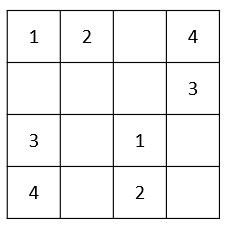

It requires to complete a partially filled $N \times N$ square with all the values in the range $\{ 1,\dots, N \}$ such that no value appears twice on any row or column.

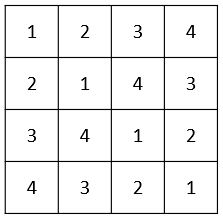

Despite its simplicity, the problem of completing a partially filled square is NP-hard. 

## Model-agnostic solution

In the model-agnostic solution, the input of the DNN is one-hot encoding of the square. It is a $N^3$ vector: one dimension for the row index, one for the column index and one for the value.

The target vector is again a one-hot encoding of the next assignement (basically a zero vector with a single 1 which represents the row, column and value of the assignment).

In this folder https://liveunibo-my.sharepoint.com/:f:/g/personal/mattia_silvestri4_unibo_it/EremZeW0ffVJoJ2zTUeHTLUBVX1jQdXGiTiWVaXys-WL6Q?e=ld5U7k you can find 3 files: a set of 1000 solutions and a set of input and target features that are obtained via a random decostruction of the solutions (for more details see the paper above) for a PLS of size 9.

Let's take a look at the data.

In [1]:
import os
import pandas as pd
import numpy as np
from utility import PLSInstance

In [2]:
dim = 9

In [3]:
solutions = pd.read_csv('datasets/pls-9/solutions.csv', header=None)

In [4]:
solutions.head()

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
squares = pd.read_csv('datasets/pls-9/partial_solutions.csv', header=None, sep=',')

In [6]:
squares.head()

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
assignments = pd.read_csv('datasets/pls-9/assignments.csv', header=None, sep=',')

In [8]:
assignments.head()

,0
0,134
1,443
2,151
3,193
4,262


In [21]:
square_example = squares.values[0]
assignment_idx = assignments.values[0].item()
assignment_idx

134

In [28]:
pls_example = PLSInstance(n=dim)
pls_example.set_square(square=square_example.reshape(dim, dim, dim))
assignment_example = np.zeros_like(square_example)
assignment_example[assignment_idx] = 1
pls_assignment_example = PLSInstance(n=dim)
pls_assignment_example.set_square(square=assignment_example.reshape(dim, dim, dim))

True

In [32]:
pls_example.visualize()
print()
pls_assignment_example.visualize()

[[7 4 8 3 2 5 1 6 9]
 [4 5 3 2 7 0 6 8 1]
 [8 3 4 5 1 6 9 2 7]
 [5 1 2 9 6 8 7 3 4]
 [3 6 5 7 4 1 8 9 2]
 [6 8 9 1 3 7 2 4 5]
 [2 9 7 6 5 3 4 1 8]
 [1 2 6 8 9 4 5 7 3]
 [9 7 1 4 8 2 3 5 6]]

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
